# My likes and interests on Twitter

By Aneesh Pandoh and Zack Youngblood (this notebook contains zack's data, from twitter account @youngbloodz01) Medium explanation on account @zcy3 

## 1. Convert Twitter files into working dataframes

In [4]:
import pandas as pd

zack_personalization = pd.read_json("/Users/zackyoungblood/Downloads/twitter-2023-04-01-164253eebfc2f27befd94659048084051b03f2cf10473669d37a34545f9d6b9b/data/personalization.js", orient='records')

In [52]:
interests_dict = zack_personalization['p13nData']['interests']['interests']
interests = pd.DataFrame.from_dict(interests_dict)
print(interests)

                   name  isDisabled
0                  $AAL       False
1                 $AAPL       False
2                  $AMD       False
3                 $AMZN       False
4                   $BA       False
..                  ...         ...
683  eCommerce industry       False
684     iOS development       False
685         mousesports       False
686       pixelatedboat       False
687                 xQc       False

[688 rows x 2 columns]


In [26]:
print(interests['name'][400])

Massachusetts Institute of Technology


In [98]:
import json

zack_likes = pd.read_json("/Users/zackyoungblood/Downloads/twitter-2023-04-01-164253eebfc2f27befd94659048084051b03f2cf10473669d37a34545f9d6b9b/data/like.js")
print(zack_likes)

# add the text of each tweet to text, instead of the ugly format below
with open('/Users/zackyoungblood/Downloads/twitter-2023-04-01-164253eebfc2f27befd94659048084051b03f2cf10473669d37a34545f9d6b9b/data/like.js') as likesFile:
    likes = json.load(likesFile)
    
    text = [like['like']['fullText'] for like in likes if list(like['like'].keys()).count('fullText') != 0]


                                                   like
0     {'tweetId': '1641497351805345792', 'fullText':...
1     {'tweetId': '1641483400388259842', 'fullText':...
2     {'tweetId': '1641394874430660613', 'fullText':...
3     {'tweetId': '1641183499196702720', 'fullText':...
4     {'tweetId': '1640770248084168707', 'fullText':...
...                                                 ...
5656  {'tweetId': '1331699042888237057', 'fullText':...
5657  {'tweetId': '1331689256889294858', 'fullText':...
5658  {'tweetId': '1331703080363192323', 'fullText':...
5659  {'tweetId': '1331441589592358912', 'fullText':...
5660  {'tweetId': '1331494969912147968', 'fullText':...

[5661 rows x 1 columns]


In [8]:
print(text)

['Thanks dad https://t.co/BKT85bcskb', 'My most productive lane. Much of my PhD thesis was ‘written’ in this lane in London as I walked daily from my residence to LSE &amp; back in the mid 70s. https://t.co/zPB5QJKSAa', 'After decades of testing, grape breeder Bruce Reisch @CornellCALS has released a high-quality white wine grape that is also disease resistant.\n\nCompared to its riesling parent, the Aravelle grape could have improved cold hardiness and similar wine quality. https://t.co/uj1DulzkKL', 'My goal is to be the first person found dead inside one of these https://t.co/8NZwyu2HxR', 'sorry but for housekeeping reasons i need to update the link in my pinned tweet, which means i am going to have to do a straightforward self-promoting tweet again, sorry to do this twice in 5 years https://t.co/43KLrK4okW', 'A human is the geometric mean of the mass of a proton and the Sun', 'It may take a while but I think I can clone ChatGPT https://t.co/1CY9hKPQO1', 'Vatican returns Parthenon sc

In [54]:
interestList = interests["name"].values.tolist()

#Replace $ with stock in interest strings
interestList = [f'Stock {interest[1:]}' if interest[0] == '$' else interest for interest in interestList]

## 2. Find similarity of each tweet to my interests

In [144]:
print("Query Started")
import requests

api_token = ''

#Semantic Sentence Similarity Model from hugging face
API_URL = "https://api-inference.huggingface.co/models/sentence-transformers/all-MiniLM-L6-v2"
headers = {"Authorization": f"Bearer {api_token}"}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()
#For each of the interest topics, save the similarity scores into a dataframe

similarityDF = pd.DataFrame()
for interest in interestList:
    if interest not in similarityDF.columns:
        data = query(
            {
                "inputs": {
                    "source_sentence": interest, #interest to match
                    "sentences": text #All likes
                }
            })
        print(f"Done with Interest: {interest}")

        similarityDF[interest] = data

Query Started
Done with Interest: Stock AAL
Done with Interest: Stock AAPL
Done with Interest: Stock AMD
Done with Interest: Stock AMZN


KeyboardInterrupt: 

In [179]:
similarityDF = pd.read_csv('similarity.csv', index_col=0)

In [47]:
# avg sentiment for each topic
mean_by_column = similarityDF.mean(axis=0)
print(mean_by_column)

Stock AAL           0.066424
Stock AAPL          0.063910
Stock AMD           0.060790
Stock AMZN          0.076921
Stock BA                 NaN
                      ...   
Political issues    0.060513
Politics                 NaN
Polygon             0.052020
Pop                      NaN
Post Malone              NaN
Length: 676, dtype: float64


My biggest topics by mean tweet similarity

In [48]:
sorted_means = mean_by_column.sort_values(ascending=False)
sorted_clean_means = sorted_means.dropna()

print('Top 15 similarities: ')
print(sorted_clean_means[:15], '\n')

print('Bottom 10 similarities: ')
print(sorted_clean_means[-10:])

Top 15 similarities: 
Twitter                 0.180102
Twitter Blue            0.150849
T-Mobile                0.149862
Tech news               0.134823
Yassuo                  0.133700
Instagram               0.129349
News                    0.128237
Techmeme                0.125124
Cyberpunk 2077          0.123444
Social media            0.122793
The Washington Post     0.122260
YouTube                 0.119976
Good Morning America    0.119647
US national news        0.115524
Backstage               0.115349
dtype: float64 

Bottom 10 similarities: 
Music festivals and concerts       0.022770
United States Healthcare System    0.020605
Computer software                  0.019633
Job Growth in the United States    0.018866
Government institutions            0.013699
Web development                    0.012867
Computer programming               0.010805
Financial planning                 0.008904
Microcontrollers                   0.008854
eCommerce industry                 0.008130
d

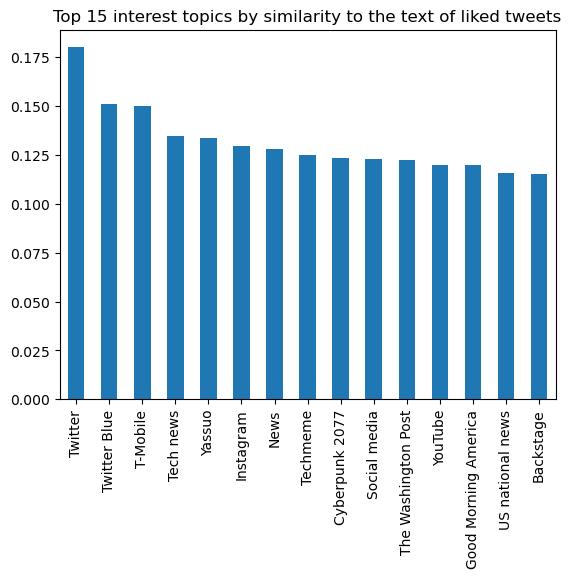

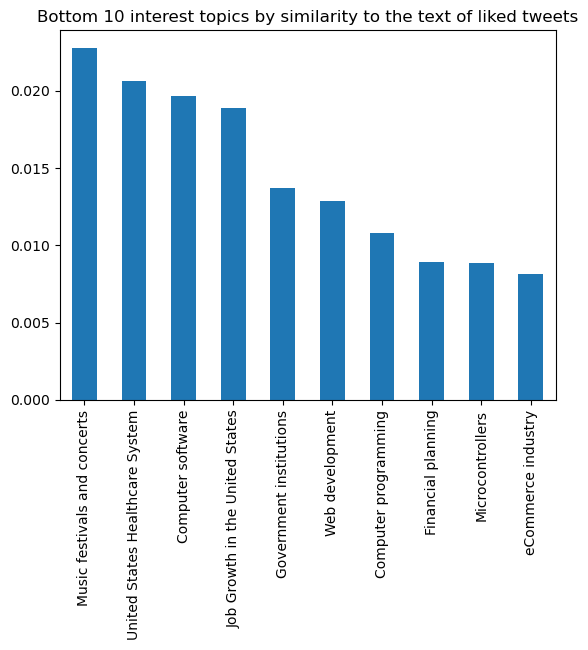

In [49]:
import matplotlib.pyplot as plt

# vis of top 15 topics by similarity to the text of my liked tweets
sorted_clean_means[:15].plot.bar(x=sorted_clean_means[:15].index)
plt.title("Top 15 interest topics by similarity to the text of liked tweets")
plt.show()

# vis of bottom 10 topics by similarity to the text of my liked tweets
sorted_clean_means[-10:].plot.bar(x=sorted_clean_means[-10:].index)
plt.title("Bottom 10 interest topics by similarity to the text of liked tweets")
plt.show()

## 3. WordCloud of All Tweets

In [181]:
from wordcloud import WordCloud

likes_text_no_links = ""
for string in text:
    
    search_str = "https://t.co/"
    remove_chars = 10
    start_index = string.find(search_str)

    while start_index != -1:
        end_index = start_index + len(search_str) + remove_chars
        string = string[:start_index] + string[end_index:]
        start_index = string.find(search_str)

    likes_text_no_links += string

Below is a piece of a series of iterations I performed to remove strings that appeared in tweets, starting with URLS that linked to the tweets, since this isn't part of the tweet text

In [180]:
search_str = "You’re unable to view this Tweet because this account owner limits who can view their Tweets. {learnmore}"
likes_text_no_limit = likes_text_no_suspend
start_index = likes_text_no_limit.find(search_str)

while start_index != -1:
    end_index = start_index + len(search_str)
    likes_text_no_limit = likes_text_no_limit[:start_index] + likes_text_no_limit[end_index:]
    start_index = likes_text_no_limit.find(search_str)

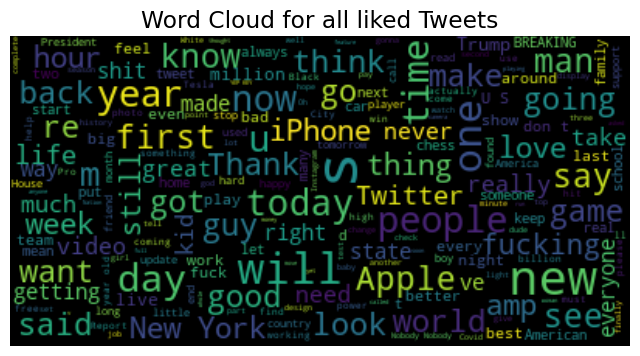

In [183]:
likes_wc = WordCloud(max_font_size=40).generate(likes_text_no_limit)

plt.figure(figsize=(8, 6))
plt.title('Word Cloud for all liked Tweets')
plt.imshow(likes_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## 4. Create wordclouds for the biggest interests

In [154]:
similarityDF2 = pd.read_csv('similarity2.csv', header=0, index_col=0)
similarityDF2.head(5)

Stock AAL  Stock AAPL  \
Thanks dad https://t.co/BKT85bcskb                   0.075404    0.113165   
My most productive lane. Much of my PhD thesis ...   0.039566    0.034478   
After decades of testing, grape breeder Bruce R...   0.075076    0.055025   
My goal is to be the first person found dead in...  -0.021680   -0.044311   
sorry but for housekeeping reasons i need to up...   0.091222    0.086028   

                                                    Stock AMD  Stock AMZN  \
Thanks dad https://t.co/BKT85bcskb                   0.112142    0.110786   
My most productive lane. Much of my PhD thesis ...   0.044074    0.002790   
After decades of testing, grape breeder Bruce R...  -0.007136   -0.017191   
My goal is to be the first person found dead in...  -0.011017   -0.001140   
sorry but for housekeeping reasons i need to up...   0.022348    0.110125   

                                                    Stock BA  Stock BABA  \
Thanks dad https://t.co/BKT85bcskb                       NaN    0.207942   
My most productive lane. Much of my PhD thesis ...       NaN    0.000195   
After decades of testing, grape breeder Bruce R...       NaN   -0.015472   
My goal is to be the first person found dead in...       NaN    0.063022   
sorry but for housekeeping reasons i need to up...       NaN    0.097997   

                                                    Stock BAC  Stock BTC  \
Thanks dad https://t.co/BKT85bcskb                        NaN   0.166624   
My most productive lane. Much of my PhD thesis ...        NaN   0.049126   
After decades of testing, grape breeder Bruce R...        NaN  -0.073541   
My goal is to be the first person found dead in...        NaN  -0.008108   
sorry but for housekeeping reasons i need to up...        NaN   0.151447   

                                                    Stock BYND   Stock C  ...  \
Thanks dad https://t.co/BKT85bcskb                    0.163031  0.208735  ...   
My most productive lane. Much of my PhD thesis ...    0.037144  0.092964  ...   
After decades of testing, grape breeder Bruce R...   -0.005738 -0.024665  ...   
My goal is to be the first person found dead in...   -0.038971 -0.008901  ...   
sorry but for housekeeping reasons i need to up...    0.109781  0.096061  ...   

                                                    Rochester      Rock  \
Thanks dad https://t.co/BKT85bcskb                   0.039096  0.160606   
My most productive lane. Much of my PhD thesis ...   0.229322  0.152570   
After decades of testing, grape breeder Bruce R...   0.060216 -0.058868   
My goal is to be the first person found dead in...   0.049327  0.122330   
sorry but for housekeeping reasons i need to up...   0.034808  0.029904   

                                                    Rock climbing  \
Thanks dad https://t.co/BKT85bcskb                       0.129357   
My most productive lane. Much of my PhD thesis ...       0.102242   
After decades of testing, grape breeder Bruce R...      -0.025789   
My goal is to be the first person found dead in...       0.184912   
sorry but for housekeeping reasons i need to up...       0.031444   

                                                    Rockstar Games  \
Thanks dad https://t.co/BKT85bcskb                        0.101523   
My most productive lane. Much of my PhD thesis ...        0.039393   
After decades of testing, grape breeder Bruce R...       -0.145146   
My goal is to be the first person found dead in...        0.124762   
sorry but for housekeeping reasons i need to up...       -0.058524   

                                                    Political figures  \
Thanks dad https://t.co/BKT85bcskb                           0.044075   
My most productive lane. Much of my PhD thesis ...           0.118831   
After decades of testing, grape breeder Bruce R...          -0.052530   
My goal is to be the first person found dead in...           0.148169   
sorry but for housekeeping reasons i need to up...           0.076927   


Assign most relevant tweets to their top 3 topics of interest

In [156]:
#Find top 3 values for each row 

def top_3_interests(row):
    top_3 = row[row >= 0.4].nlargest(3)
    return top_3.index.tolist()
top_3_interests_df = similarityDF2.apply(top_3_interests, axis=1)

new_df = pd.DataFrame({name: [] for name in interestList})

tweets = list(top_3_interests_df.index)
print(len(tweets))

5580


In [157]:
for index,row in top_3_interests_df.items():
    if bool(row) == False:
        print(f"Done with empty row name: {index}")
        tweets.remove(index)

    else:
        new_row = pd.Series({name: 1 if name in row else 0 for name in interestList})
        print(f"Done with row name: {index}")
        new_df = new_df.append(new_row, ignore_index=True)

Done with empty row name: Thanks dad https://t.co/BKT85bcskb
Done with empty row name: My most productive lane. Much of my PhD thesis was ‘written’ in this lane in London as I walked daily from my residence to LSE &amp; back in the mid 70s. https://t.co/zPB5QJKSAa
Done with empty row name: After decades of testing, grape breeder Bruce Reisch @CornellCALS has released a high-quality white wine grape that is also disease resistant.

Compared to its riesling parent, the Aravelle grape could have improved cold hardiness and similar wine quality. https://t.co/uj1DulzkKL
Done with empty row name: My goal is to be the first person found dead inside one of these https://t.co/8NZwyu2HxR
Done with row name: sorry but for housekeeping reasons i need to update the link in my pinned tweet, which means i am going to have to do a straightforward self-promoting tweet again, sorry to do this twice in 5 years https://t.co/43KLrK4okW
Done with empty row name: A human is the geometric mean of the mass of 

/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Done with empty row name: when the teacher asks what the answer for mx + b is https://t.co/lz4KzganSz
Done with empty row name: In WW2, Londoners were asked to black out their homes at night so the enemy bombers wouldn’t see the lights &amp; know where to target. No Londoner said,”It’s my right to have lights on”. Cuz others would say,”your light on endangers us.”Substitute “light” for “mask”. Now argue.
Done with empty row name: Mike Pence: "We don't want CDC guidance to be a reason why people don't reopen their schools." https://t.co/2T6V4LIC1P
Done with empty row name: سه نفر در ایران برای شرکت کردن در تظاهرات محکوم به مرگ شده اند. اعدام آنها در هر لحظه قابل انتظار است. اعدام این سه نفر پیامی اسفناک به دنیا می فرستد و نباید انجام شود. #اعدام_نکنید
Done with row name: Every Member Of Police Department Excitedly Volunteers To Go Undercover In White Supremacist Group https://t.co/7gMoBKTFAb https://t.co/lJA3cky4GR
Done with row name: Night after night of violence has rocked Portland, O

/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Done with empty row name: Digitimes: 2020 iPhone to feature 120Hz high refresh rate 'ProMotion' display https://t.co/3MA3rEiykR by @bzamayo https://t.co/4tlbUk4BZf
Done with empty row name: how it feels to cross a street on #ModernWarfare https://t.co/7sEwlIYC5f
Done with row name: This Tweet is from a suspended account. {learnmore}
Done with empty row name: Ready to fight for Medicare for All. https://t.co/tltURZpb6a
Done with row name: Donald Trump has a message for 'Tim Apple' about iPhone design https://t.co/TAVzMnRnET
Done with empty row name: R-Rated box office congratulatory posts aren’t like the ones you’re used to... https://t.co/OTy2BqIP4f
Done with empty row name: imagine u hear a noise in ur attic &amp; u check to see what it is and u see a rat driving a fucking car https://t.co/ghxireQtOA
Done with empty row name: @adeptthebest I lost
Done with empty row name: All The Good Sentiments On ‘Get Well Soon’ Card Already Taken https://t.co/fC2vW4fntr https://t.co/8apyN6jRjS
Done

/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Done with empty row name: somebody finna get sued lol https://t.co/iFZC4LJ14y
Done with empty row name: Tesla Vision uses path prediction to accurately predict how a road will extend, even when it can’t see around the corner https://t.co/09qPkpqwSC
Done with row name: All Tesla cars being built today have the hardware necessary for full self-driving:
 
8 vision cameras, 12 ultrasonic sensors, radar, and this custom-designed beast of a Full Self-Driving Computer https://t.co/jYMAhB5Ooc
Done with empty row name: Scientists Recommend Having Earth Put Down https://t.co/Dk3BRmlpOf https://t.co/MLNin9Riui
Done with empty row name: Doomed Rabbit To Teach 8-Year-Old About Responsibility https://t.co/GWOAdpWmrU https://t.co/oEeeugab3c
Done with empty row name: Drake must be stopped 😭 https://t.co/iUvG9GbmqP
Done with empty row name: @BarackObama tell Bo his socks are uneven but otherwise amazing pic
Done with row name: bumped into the actor for iron man yesterday, turns out the movies are all s

/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Done with empty row name: Oh my fuckin god https://t.co/gu7jyDFiXv
Done with empty row name: Time to put them to work!
Done with empty row name: No bro coffee doesn't give you anxiety you just need to try the right roast bro
Done with empty row name: Just liked Seth Rogens tweet 58 seconds after he posted it we are so connected it’s unbelievable
Done with empty row name: https://t.co/KsKX3397Tc
Done with empty row name: https://t.co/rpIFXtoKPY
Done with empty row name: https://t.co/NEnnSbQx8O
Done with empty row name: M1 Max Chip May Have More Raw GPU Performance Than a PlayStation 5 https://t.co/tYh6d1Abl4 by @SamiFathi_ https://t.co/rzFsDi1H7y
Done with row name: This Tweet is from a suspended account. {learnmore}
Done with empty row name: Also this wouldn’t be an Apple event if I wasn’t nerding out about this lab with perfect soft overhead lighting, perfect cable management and an array of literally 40 Mac Pro over his shoulder. Casual. https://t.co/q5KkwzXM6E
Done with row name: sh

/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Done with empty row name: Mouth breathers must wear a mask for eternity
Done with row name: You’re unable to view this Tweet because this account owner limits who can view their Tweets. {learnmore}
Done with row name: how do you guys play chess? this game is so hard wtf
Done with empty row name: Wow I'm sorry you had to struggle so much https://t.co/8Q0KXUTkCu
Done with empty row name: https://t.co/4ox6XoIeBQ
Done with empty row name: AUTOPAY WAS ON BUT MY CREDITCARD LIMIT IS THE SAME I HAD WHEN I WAS 12 SO SOMETIMES ITS EMPTY AND PAYMENT CANT GO THROUGH. JUST CANADIAN BANK STUFF MOVE ALONG
Done with empty row name: Scam channels just got a huge boner from this change. Hiding dislikes will make it harder for people to know if a video is promoting a scam https://t.co/pqELlZGzuN
Done with empty row name: Time for lil sas reading hour
Done with empty row name: i must expand my brain brother
Done with empty row name: Turns out "Voltswagen" was actually an April Fools Day lie

... it's not 

/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Done with empty row name: https://t.co/Mk3GGGH7Rg
Done with empty row name: How it started:            How it's going: https://t.co/7WNZjsZIVd
Done with empty row name: https://t.co/rQs3NZlK9d https://t.co/6ihInfGFuF
Done with empty row name: 2021's first full moon https://t.co/z1IrHvpSnO
Done with empty row name: Gonna watch uncut gems tonight, basically about my life
Done with empty row name: https://t.co/8RhwZfjoFY
Done with row name: Me imagining our world right now if Biden tweeted like Trump: https://t.co/AcBUaUZn1w
Done with empty row name: https://t.co/f8PlfflQMp
Done with row name: new york cock exchange on ball street
Done with row name: Hold $DOGE. We have so much work to do still. 95 cents to go. 🚀🚀🚀.
Done with row name: Robin Hood is a 501(c)(3) charitable organization. We are not affiliated with any for-profit businesses that use a similar name.
Done with row name: Why are these hedge fund managers mad? They have their $600 check to fall back on.
Done with row name: For a

/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Done with empty row name: @lilsasquatch66 Goodnight boss, love you
Done with row name: albert power https://t.co/mKyMbd0sW9
Done with row name: This Tweet is from a suspended account. {learnmore}
Done with empty row name: i’m tired of being silent about this! it’s “Lil Nas the 10th” not “Lil Nas Ex”
Done with empty row name: California’s 55 electoral votes for President-elect Joe Biden pushed him over the 270 threshold to formalize his victory over President Trump.  https://t.co/e6i8bYGusf https://t.co/TgG7Bl2JdF
Done with empty row name: https://t.co/4JMmzm61w0
Done with empty row name: which way western woman https://t.co/fIyQQ2TDR3
Done with empty row name: Addison Rae in recent interview: "Honestly if you don't have over a million followers on Tik Tok you shouldn't be allowed to get the vaccine. I don't give a fuck if you're old, if you don't go viral you don't deserve to live."
Done with empty row name: Maybe Jesus is the real vaccine 🙏
Done with empty row name: Got a couple bange

/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/folders/01/_xbv3ctd64z24dvcyq6y6y080000gp/T/ipykernel_18130/4117243206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [158]:
new_df.index = tweets
new_df.head(100)

Stock AAL  Stock AAPL  \
sorry but for housekeeping reasons i need to up...        0.0         0.0   
It may take a while but I think I can clone Cha...        0.0         0.0   
Vladimir Putin said Russia is preparing to stat...        0.0         0.0   
@business ?                                               0.0         0.0   
You’re unable to view this Tweet because this a...        0.0         0.0   
...                                                       ...         ...   
The front page of The New York Times for Nov. 1...        0.0         0.0   
Hong Kong disqualifies four pro-democracy lawma...        0.0         0.0   
This Tweet is from a suspended account. {learnm...        0.0         0.0   
This Tweet is from a suspended account. {learnm...        0.0         0.0   
This Tweet is from a suspended account. {learnm...        0.0         0.0   

                                                    Stock AMD  Stock AMZN  \
sorry but for housekeeping reasons i need to up...        0.0         0.0   
It may take a while but I think I can clone Cha...        0.0         0.0   
Vladimir Putin said Russia is preparing to stat...        0.0         0.0   
@business ?                                               0.0         0.0   
You’re unable to view this Tweet because this a...        0.0         0.0   
...                                                       ...         ...   
The front page of The New York Times for Nov. 1...        0.0         0.0   
Hong Kong disqualifies four pro-democracy lawma...        0.0         0.0   
This Tweet is from a suspended account. {learnm...        0.0         0.0   
This Tweet is from a suspended account. {learnm...        0.0         0.0   
This Tweet is from a suspended account. {learnm...        0.0         0.0   

                                                    Stock BA  Stock BABA  \
sorry but for housekeeping reasons i need to up...       0.0         0.0   
It may take a while but I think I can clone Cha...       0.0         0.0   
Vladimir Putin said Russia is preparing to stat...       0.0         0.0   
@business ?                                              0.0         0.0   
You’re unable to view this Tweet because this a...       0.0         0.0   
...                                                      ...         ...   
The front page of The New York Times for Nov. 1...       0.0         0.0   
Hong Kong disqualifies four pro-democracy lawma...       0.0         0.0   
This Tweet is from a suspended account. {learnm...       0.0         0.0   
This Tweet is from a suspended account. {learnm...       0.0         0.0   
This Tweet is from a suspended account. {learnm...       0.0         0.0   

                                                    Stock BAC  Stock BTC  \
sorry but for housekeeping reasons i need to up...        0.0        0.0   
It may take a while but I think I can clone Cha...        0.0        0.0   
Vladimir Putin said Russia is preparing to stat...        0.0        0.0   
@business ?                                               0.0        0.0   
You’re unable to view this Tweet because this a...        0.0        0.0   
...                                                       ...        ...   
The front page of The New York Times for Nov. 1...        0.0        0.0   
Hong Kong disqualifies four pro-democracy lawma...        0.0        0.0   
This Tweet is from a suspended account. {learnm...        0.0        0.0   
This Tweet is from a suspended account. {learnm...        0.0        0.0   
This Tweet is from a suspended account. {learnm...        0.0        0.0   

                                                    Stock BYND  Stock C  ...  \
sorry but for housekeeping reasons i need to up...         0.0      0.0  ...   
It may take a while but I think I can clone Cha...         0.0      0.0  ...   
Vladimir Putin said Russia is preparing to stat...         0.0      0.0  ...   
@business ?                                             

In [165]:
catergorizedDF = pd.read_csv('CategorizedTweets.csv', header=0, index_col=0)

In [195]:
# calculate the sum of each column to get the total amount for each word
sums = catergorizedDF.sum(axis=0)

# create a list of columns to remove where the sum is zero
cols_to_remove = sums[sums == 0].index.tolist()

# remove the columns with zero sum
catergorizedDF = catergorizedDF.loc[:, ~catergorizedDF.columns.isin(cols_to_remove)]


sums = catergorizedDF.sum(axis=0)

# sort the resulting series in descending order
# take the top 10 rows of the sorted series
sortedSums = sums.sort_values(ascending=False)
#Drop unwanted
sortedSums = sortedSums.drop(['Twitter', 'Twitter Blue'])

most_15 = sortedSums.head(15)

# sort the resulting series in descending order
# take the top 10 rows of the sorted series
leastsortedSums = sums.sort_values(ascending=True)
least_15 = leastsortedSums.head(15)

print(f"Top 15 most used:\n{most_15}\n")
print(f"Top 15 least used:\n{least_15}")

Top 15 most used:
Iphone 14          46.0
Cyberpunk 2077     38.0
New York City      33.0
COVID-19           32.0
Chess              29.0
Tesla Motors       22.0
Twitch             21.0
New York State     21.0
Instagram          20.0
T-Mobile           18.0
PC gaming          17.0
Joe Biden          16.0
Samsung            15.0
iOS development    14.0
China politics     13.0
dtype: float64

Top 15 least used:
Stock AAL                1.0
Esports players          1.0
Famous comedians         1.0
Fantasy football         1.0
Sesame Street            1.0
Financial planning       1.0
Sebastian Vettel         1.0
Fintech                  1.0
Sci-fi and fantasy       1.0
Futurology               1.0
Game development         1.0
RuPaul's Drag Race UK    1.0
Rose Namajunas           1.0
Rock                     1.0
Georges St-Pierre        1.0
dtype: float64


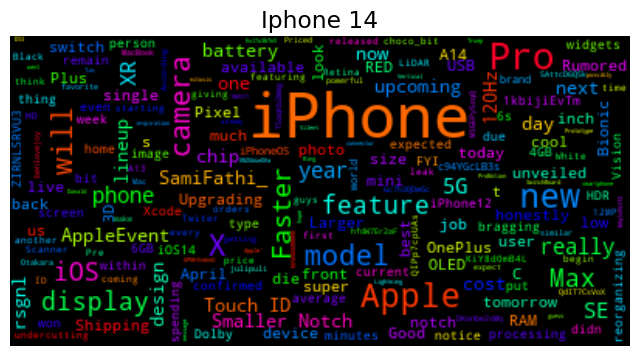

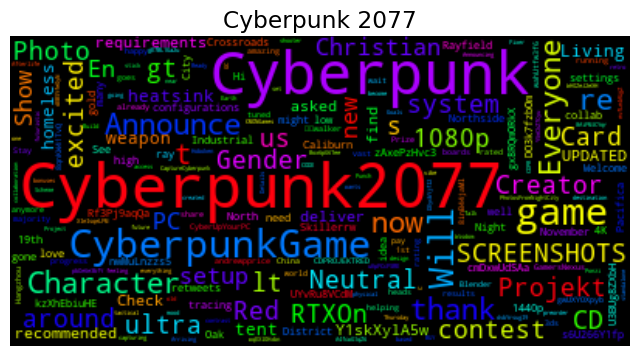

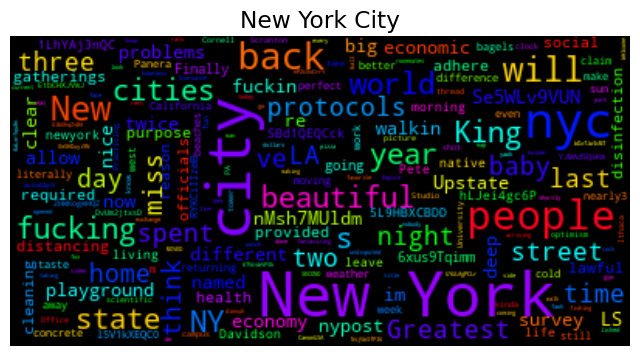

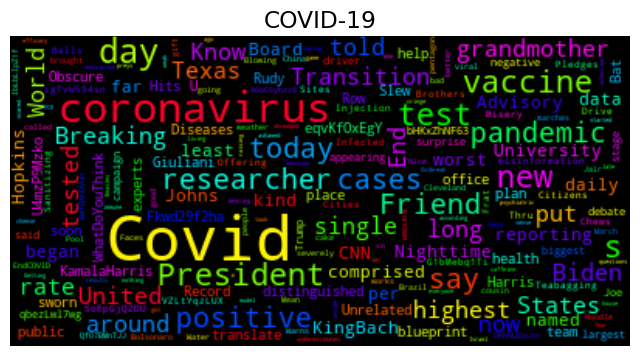

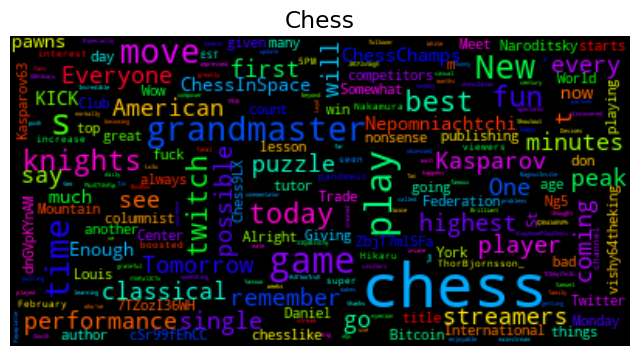

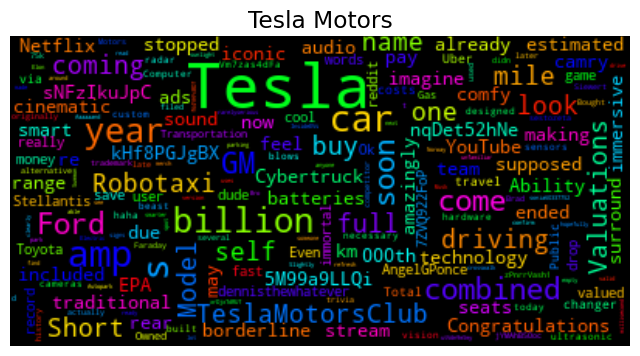

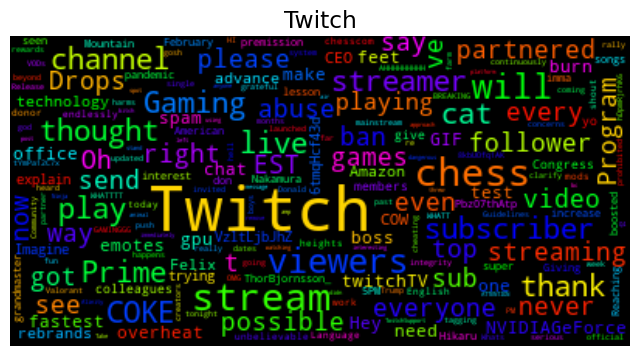

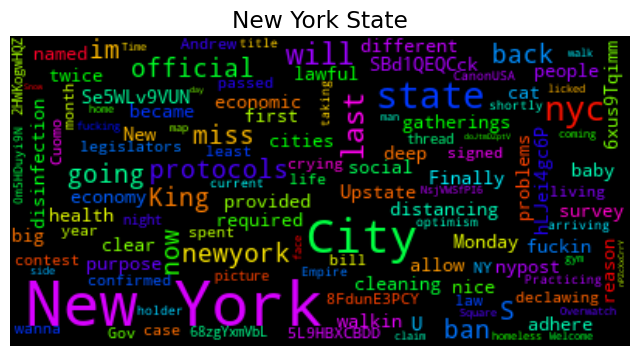

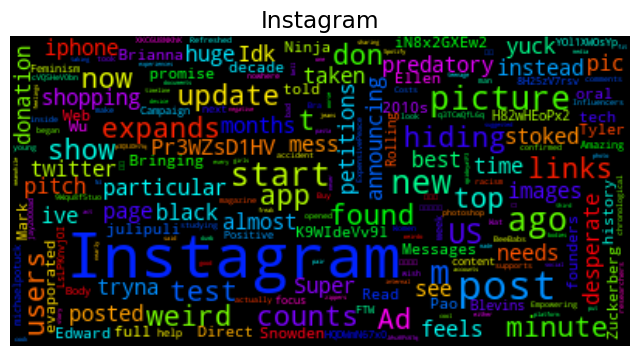

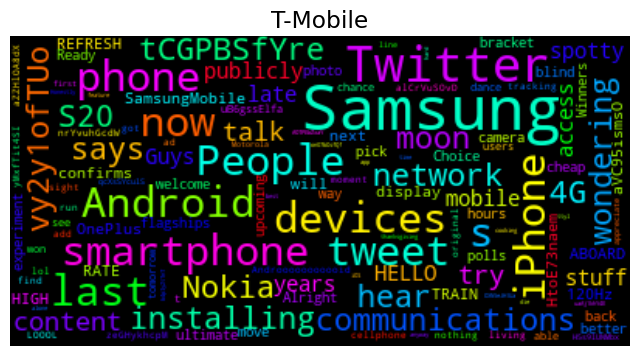

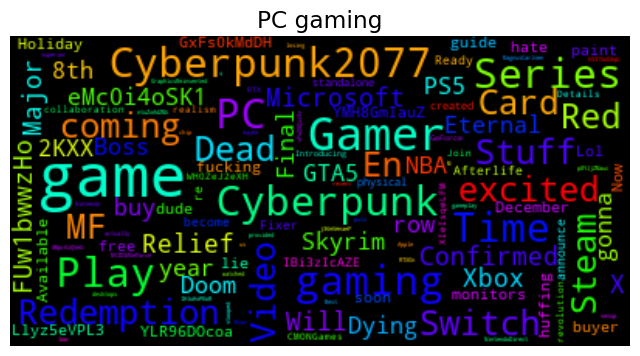

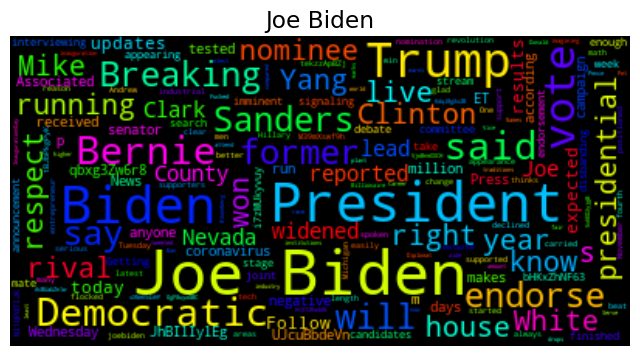

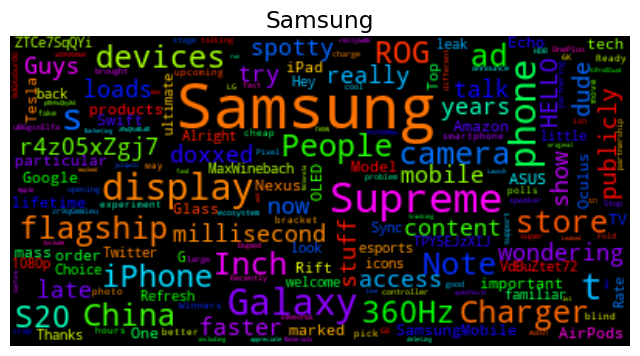

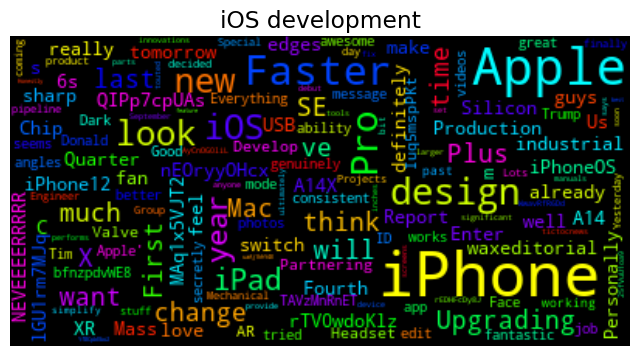

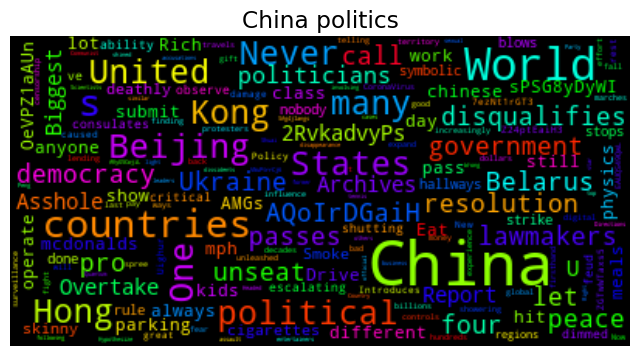

In [196]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for interest, col in most_15.items():
    tweetString = ""
    for tweet, row in catergorizedDF.iterrows():
        if row[interest] == 1:
            tweetString += f' {tweet}'
    tweetString = tweetString.replace("https://t.co/", "")
    interestWC = WordCloud(background_color='black', colormap='gist_rainbow', max_font_size=40).generate(tweetString)
    plt.figure(figsize=(8, 6))
    plt.title(interest)
    plt.axis('off')
    plt.imshow(interestWC, interpolation="bilinear")

## 5. Sentiment analysis of my interests

In [168]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pos = {}
neg = {}
neu = {}
for interest, col in most_15.items():
    tweetString = ""
    for tweet, row in catergorizedDF.iterrows():
            if row[interest] == 1:
                tweetString += f' {tweet}'
    tweetString = tweetString.replace("hhttps://t.co/", "")
    
    sentiment = sid.polarity_scores(tweetString)
    
    pos[interest] = sentiment['pos']
    neg[interest] = sentiment['neg']
    neu[interest] = sentiment['neu']

    print(f"{interest}: {sentiment}")

Iphone 14: {'neg': 0.024, 'neu': 0.888, 'pos': 0.088, 'compound': 0.9963}
Cyberpunk 2077: {'neg': 0.029, 'neu': 0.876, 'pos': 0.095, 'compound': 0.9823}
New York City: {'neg': 0.016, 'neu': 0.865, 'pos': 0.12, 'compound': 0.9958}
COVID-19: {'neg': 0.102, 'neu': 0.833, 'pos': 0.066, 'compound': -0.9716}
Chess: {'neg': 0.052, 'neu': 0.79, 'pos': 0.157, 'compound': 0.9968}
Tesla Motors: {'neg': 0.017, 'neu': 0.9, 'pos': 0.083, 'compound': 0.9665}
Twitch: {'neg': 0.053, 'neu': 0.844, 'pos': 0.103, 'compound': 0.9566}
New York State: {'neg': 0.043, 'neu': 0.912, 'pos': 0.045, 'compound': 0.4004}
Instagram: {'neg': 0.103, 'neu': 0.763, 'pos': 0.134, 'compound': 0.9213}
T-Mobile: {'neg': 0.056, 'neu': 0.793, 'pos': 0.15, 'compound': 0.9811}
PC gaming: {'neg': 0.067, 'neu': 0.77, 'pos': 0.163, 'compound': 0.9674}
Joe Biden: {'neg': 0.009, 'neu': 0.846, 'pos': 0.146, 'compound': 0.9957}
Samsung: {'neg': 0.09, 'neu': 0.719, 'pos': 0.191, 'compound': 0.9918}
iOS development: {'neg': 0.003, 'neu':

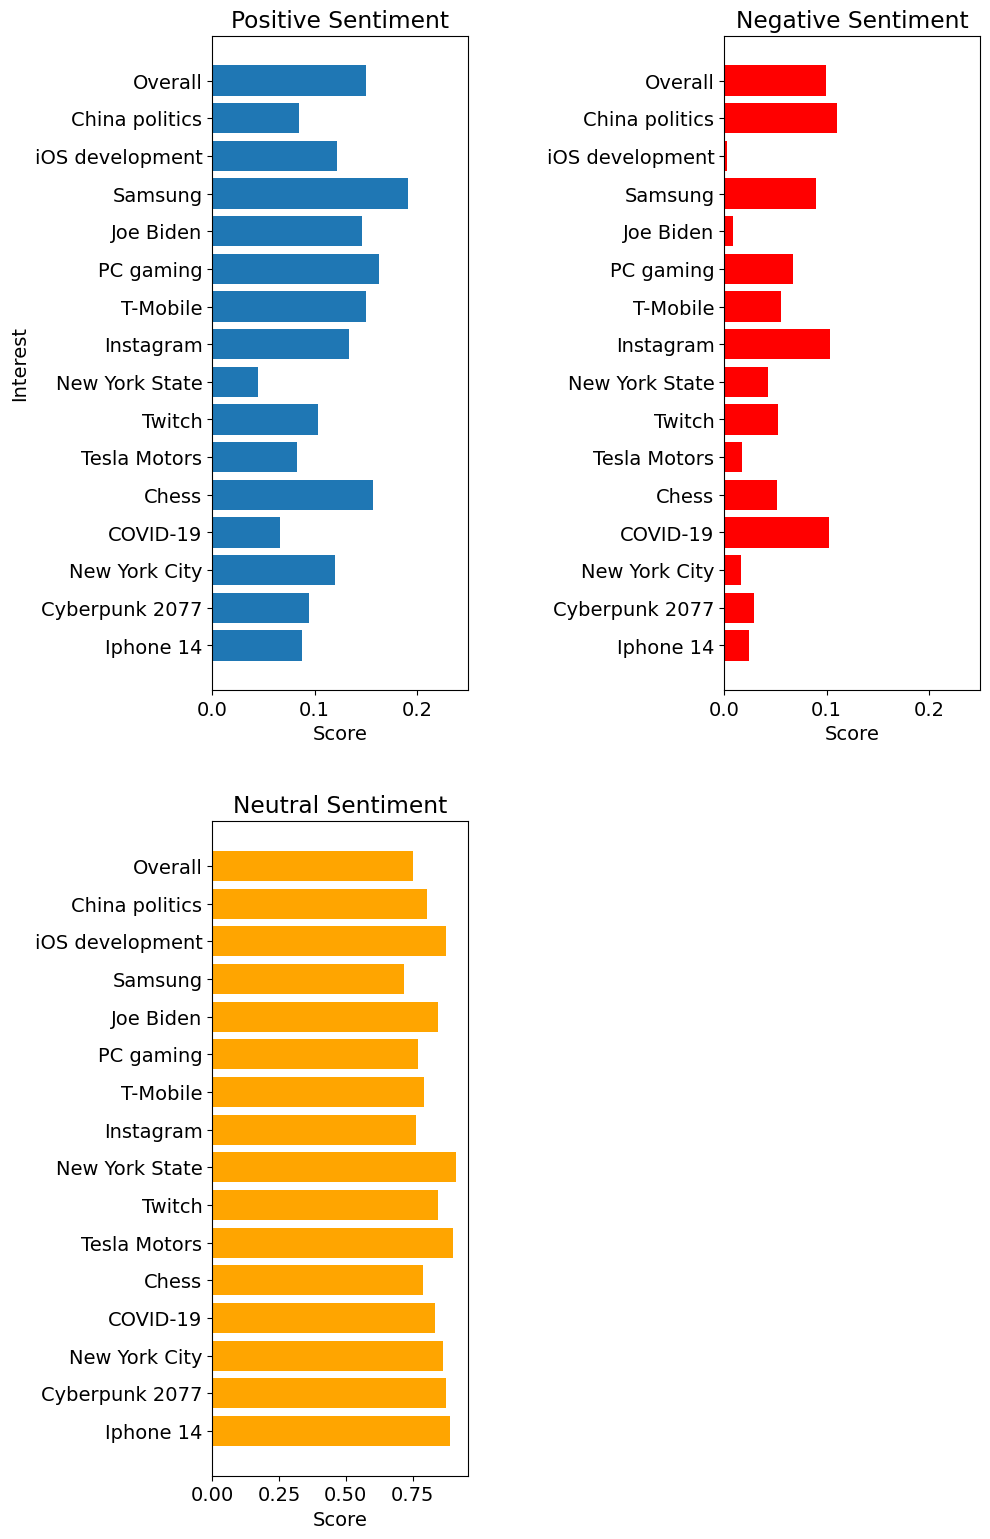

<Figure size 1000x600 with 0 Axes>

In [169]:
sentiment = sid.polarity_scores(likes_text_no_limit)
    
pos["Overall"] = sentiment['pos']
neg["Overall"] = sentiment['neg']
neu["Overall"] = sentiment['neu']

plt.subplot(2,2,1)
plt.barh(range(len(pos)), list(pos.values()), align='center')
plt.yticks(range(len(pos)), list(pos.keys()))
plt.xlabel('Score')
plt.ylabel('Interest')
plt.title('Positive Sentiment')
plt.xlim([0, 0.25])

plt.subplot(2,2,2)
plt.barh(range(len(neg)), list(neg.values()), align='center', color = 'red')
plt.yticks(range(len(neg)), list(neg.keys()))
plt.xlabel('Score')
plt.title('Negative Sentiment')
plt.xlim([0, 0.25])


plt.subplot(2,2,3)
plt.barh(range(len(neu)), list(neu.values()), align='center', color = 'orange')
plt.yticks(range(len(neu)), list(neu.keys()))
plt.xlabel('Score')
plt.title('Neutral Sentiment')

# Show the plot
plt.subplots_adjust(left=0, right=1.2, top=3, bottom=0, wspace=1, hspace = 0.2)
# set the figure size and font size
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})


plt.show()

## 6. Bag of Words matrix for interests

In [176]:
sortedSums.head(100)

Iphone 14          46.0
Cyberpunk 2077     38.0
New York City      33.0
COVID-19           32.0
Chess              29.0
                   ... 
Space missions      5.0
Caucasian James     5.0
Fruits              5.0
Movies              5.0
Sporting events     5.0
Length: 100, dtype: float64

In [177]:
from nltk.tokenize import word_tokenize
import string

def get_clean_words(text, exclude_words=[]):

    # Extarct words
    words = word_tokenize(text)
    
    # Add exclude words to words to give it same treatment
    words += exclude_words
    
    # Convert to lower case
    words = [w.lower() for w in words]
    
    # Clear punctuation
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in words]
    
    # Seperate words and exclude words
    if len(exclude_words) > 0:
        exclude_words = words[-len(exclude_words):]
        words = words[:-len(exclude_words)]
    
    # Remove non-alphabetic words
    words = [w for w in words if w.isalpha()]
    
    # Remove single letter words 
    words = [w for w in words if len(w) > 1]

    return words

BOW = pd.DataFrame()
wordsDict = {}

most_100 = sortedSums.head(100)
print(most_100)
#Make bag of words for every interest
for interest, col in most_100.items():
    tweetString = ""
    for tweet, row in catergorizedDF.iterrows():
            if row[interest] == 1:
                tweetString += f' {tweet}'
    tweetString = tweetString.replace("https://t.co/", "")
    
    wordsDict = wordsDict.fromkeys(wordsDict, 0)
    wordsList = (get_clean_words(tweetString))
    for word in wordsList:
        if word in wordsDict:
            wordsDict[word] += 1 #increment if already in dict
        else:
            wordsDict[word] = 1 #add to dict if not in dict
    BOW[interest] = wordsDict

Iphone 14          46.0
Cyberpunk 2077     38.0
New York City      33.0
COVID-19           32.0
Chess              29.0
                   ... 
Space missions      5.0
Caucasian James     5.0
Fruits              5.0
Movies              5.0
Sporting events     5.0
Length: 100, dtype: float64


In [178]:
BOW = BOW.transpose()
BOW.head(200)

the  iphone  pro  and  max  models  feature  of  ram  while  \
Iphone 14         42      57   14   24    5       6        5  11    2      1   
Cyberpunk 2077    15       0    0    9    0       0        0   7    0      0   
New York City     16       0    0    5    0       0        0   9    0      0   
COVID-19          28       0    0    8    0       0        0  12    0      0   
Chess             21       0    0   14    0       0        0  12    0      0   
...              ...     ...  ...  ...  ...     ...      ...  ..  ...    ...   
Space missions     3       0    0    1    0       0        0   4    0      0   
Caucasian James    1       0    0    0    0       0        0   0    0      0   
Fruits             0       0    0    1    0       0        0   0    0      0   
Movies             4       0    0    1    0       0        0   3    0      0   
Sporting events    5       0    0    2    0       0        0   0    0      0   

                 ...  surf  waves  left  hanging  noon  got  hting  amazing  \
Iphone 14        ...     1      1     1        1     1    1      1        1   
Cyberpunk 2077   ...     0      0     0        0     0    0      0        1   
New York City    ...     0      0     0        0     0    0      0        0   
COVID-19         ...     0      0     0        0     0    1      0        0   
Chess            ...     0      0     0        0     0    0      0        0   
...              ...   ...    ...   ...      ...   ...  ...    ...      ...   
Space missions   ...     0      0     0        0     0    0      0        0   
Caucasian James  ...     0      0     0        0     0    0      0        0   
Fruits           ...     0      0     0        0     0    0      0        0   
Movies           ...     0      0     0        0     0    0      0        0   
Sporting events  ...     0      0     0        0     0    0      0        0   

                 never  dies  
Iphone 14            1     1  
Cyberpunk 2077       0     0  
New York City        0     0  
COVID-19             0     0  
Chess                0     0  
...                ...   ...  
Space missions       0     0  
Caucasian James      0     0  
Fruits               0     0  
Movies               0     0  
Sporting events      0     0  

[100 rows x 414 columns]

## 7. Word frequency in liked Tweets (in total and by interest)

In [184]:
# calculate the sum of each column to get the total amount for each word
totalWords = BOW.sum(axis=0)

# sort the resulting series in descending order
# take the top 10 rows of the sorted series
sortedMost = totalWords.sort_values(ascending=False)
most_words = sortedMost.head(10)


# sort the resulting series in descending order
# take the top 10 rows of the sorted series
sortedLeast = totalWords.sort_values(ascending=True)
least_words = sortedLeast.head(5)

print(f"Top 10 most used:\n{most_words}\n")
print(f"Top 5 least used:\n{least_words}")

Top 10 most used:
the     589
to      436
and     267
in      260
of      253
is      214
for     184
on      159
this    142
new     135
dtype: int64

Top 5 least used:
dies            1
preorders       1
adding          1
underdisplay    1
corroborates    1
dtype: int64


### Vizualizing our distribution of words

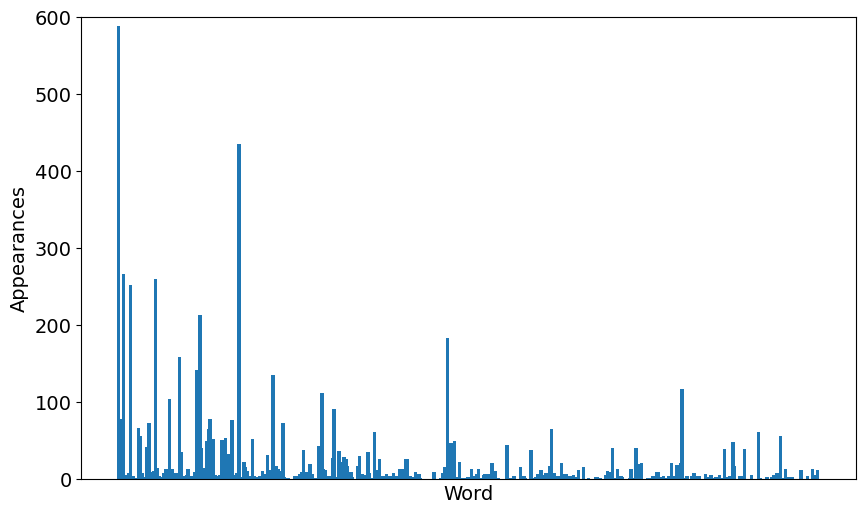

In [194]:
fig, ax = plt.subplots()
plt.bar(totalWords.index, totalWords.values, width = 2)
plt.xlabel("Word")
plt.ylabel("Appearances")
plt.xticks([])
plt.ylim(0,600)
fig.set_size_inches(10, 6) 
plt.show()

### Principal Component Analysis of the Bag of Words

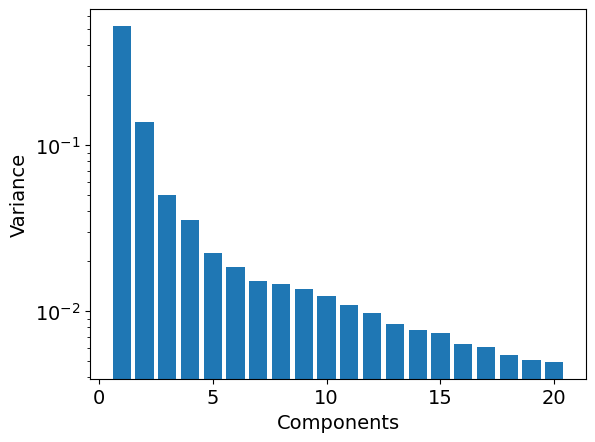

The first 2 components explain 0.66 of the total variance!


In [191]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(BOW)
from matplotlib import pyplot as plt
expl_var_rat = pca.explained_variance_ratio_
plt.yscale("log")
plt.bar(range(1,21),expl_var_rat)
plt.xlabel("Components")
plt.ylabel("Variance")
plt.show()

variance_ratio_sum = sum(expl_var_rat[:2])
print(f"The first 2 components explain {variance_ratio_sum:.2f} of the total variance!")